# Full Name:  


# Student ID:

# Find words of certain patterns: Scrabble with ME536 flavor
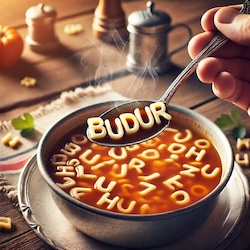


# as usual, start with imports

You are not allowed to import additional libraries, but you can import other sub-libraries for conveinence

In [ ]:
# import usual suspects
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as pimg # check this out this is new
from numpy import cos, arccos, sin, pi, round
from numpy.linalg import matrix_rank as rank
from numpy.linalg import svd, eig
from scipy.linalg import orth
from scipy.ndimage import convolve
import cv2 as cv
from skimage import io
from skimage.filters import threshold_otsu as otsu
from PIL import Image, ImageDraw, ImageFont
from PIL import Image # if needed more can be importaed
import sklearn as skl # famous sci-kit learn
import skimage as ski # equally famous sci-kit image
!rm bug_numpy_utils.py 2>/dev/null  # at the first run file does not exits but error should print
!wget https://raw.githubusercontent.com/bugrakoku/bug_python_utils/main/bug_numpy_utils.py
from bug_numpy_utils import MatPrint, CData, text2mat # note that once these files are downloaded you can read their content.
from bug_numpy_utils import DrawOnImage as DrawIt
!rm me536utils.py 2>/dev/null  # at the first run file does not exits but error should print
!wget https://raw.githubusercontent.com/bugrakoku/bug_python_utils/main/me536utils.py
from me536utils import RotMat

## Let's get started with generating a test image
Test images to functions you will write can be generated using the following code.  

Some of the paramters will not change, yet play with the changable parameters to see what kind of different images can be generated with it.  

Note that at the end a __box__ and a __line__ is also drawn on the image to demonstrate the usage of already provided (imported) function: ```DrawIt()```.

So all utilities are already provided, so that you can focus on the tast itself!

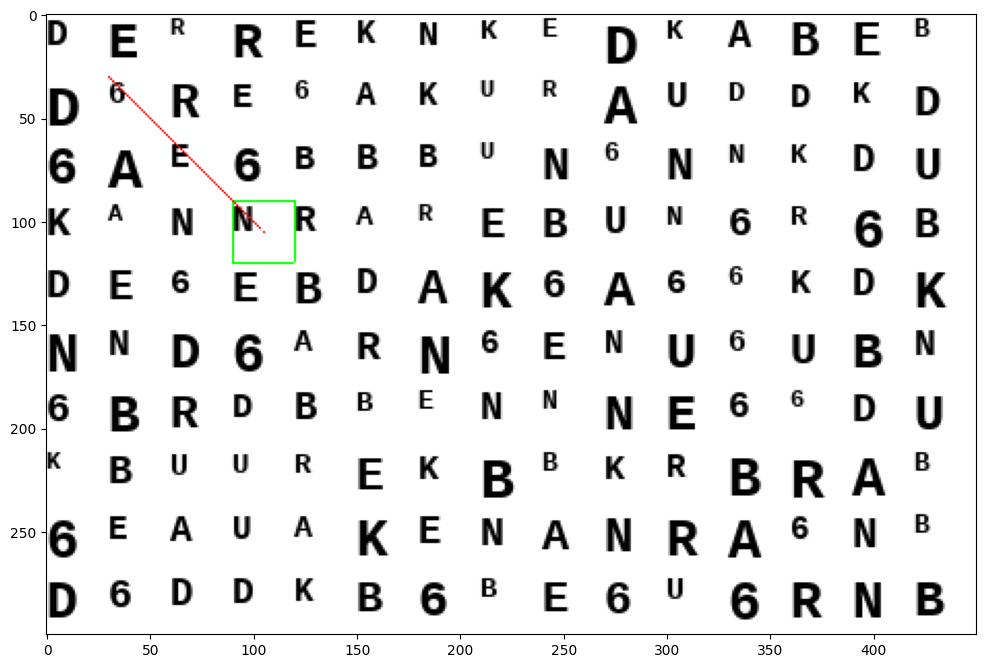

In [ ]:
# in the assignment assessment following will not change in test images
fontname = '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf'
cellSize = 30 #cell within which a single char will be printed
BackColor = (255,255, 255) # back color
ForeColor = (0, 0, 0) # font color

charz = ['B', 'U', 'D', 'R', 'K', 'A', 'E', '6', 'N']
# in the assignment assessment variable above will not change in generating test images

# CHANGABLE PARAMETER
xCount, yCount = 15, 10 # number of cells

# prompt: generate a list that is 10 by 15 that that contains * in each element
charmap = [['' for i in range(xCount)] for j in range(yCount)] # assign

# CHANGABLE PARAMETER
numLetters = 1500 #well obvious

# CHANGABLE PARAMETER
fixedFontSize = False #if variable font size will be used

fR = 0.8 # font ratio to cell size
fontsize = int(cellSize * fR) # fixed font size
nB = int(cellSize*(1-fR)) # location noise

img = Image.new('RGB', (xCount*cellSize,yCount*cellSize), BackColor ) # blank image
imgPen = ImageDraw.Draw(img) # pen to draw on the blank image

pos = [] # keep track of occupied cells
for i in range(numLetters): # draw each letter if random location is not already occupied, if occupied, skip
    if not fixedFontSize: # if set so, select a random font size
        fontsize = np.random.randint(12, cellSize-1)
        dx, dy = 0, 0 # when scaled, position does not change
    else: # add some location noise
        dx = int(np.random.rand()* nB)
        dy = int(np.random.rand()* nB)
    font = ImageFont.truetype(fontname, fontsize) # font instace created
    txt = random.choice(charz)
    x = np.random.randint(0, xCount)
    y = np.random.randint(0, yCount)
    if (x,y) not in pos:
        imgPen.text((x * cellSize + dx, y * cellSize + dy), txt, font=font, fill=ForeColor) # write the character to blank image
        pos.append((x,y))

img = np.array(img) # convert PIL image to numpy for future numpy stuff, this is what I will pass to your function



'''
The following is to be used in generating the resulting image in your function
Note that you will need more colors, and location of lines and boxes will be determined by your function
'''
# generate 2 sample pens
penRed = (255,0, 0)
penGreen = (0,255,0)

# a green box with no diagonals
img = DrawIt(img, ((90, 90),(120, 120)), box=True, diagonals = False, dpen=penGreen)
# finally a blue line
img = DrawIt(img, ((30, 30),(105, 105)), dpen = penRed)



# finally plot the image
plt.figure(figsize=(12,9))
plt.imshow(img)


# Your assignment starts here

You are to write 1 function to which an image generated by the code above will be passed along with one of the following words: "KARE", "BUDUR" and "6KENAR".  
Note that all letters will be upper case.  

The stub of the function you are to complete is given below.  

If **KARE** is pased, your function at the end should:  
- Change the colors (i.e. 4 different colors in total) of all the letters in "KARE" for all instances of letters 'K', 'A', 'R' and 'E' so that we can see that your algorithm was able to find all relevant letters.
- Select the 4 letters 'K', 'A', 'R' and 'E' in a row, draw a fixed colored box around the selected letters and connect their centers with lines, so that when you follow the letters from 'K' to 'E' it should look like the best possible square within the given image. When connecting letters, finally connect 'E' to 'K' so that it properly looks like a polygon.

If **BUDUR** is passed, your function should:
- Similarly, change the colors (i.e. 5 differen colors in total) of all letters in "BUDUR" for all instances of 'B', 'U', 'D', 'U' and 'R'.  
- This time, you are trying to find the shortest path that connects the letters of the word "BUDUR". Once sequence is found, similarly put a colored box around all 6 letters and connect them with lines from 'B' all the way to 'R'.  Do not connect 'R' back to 'B', since this is a path.

If **6KENAR** is passed, your function should:
- Well, same deal goes on, change the colors of (i.e. 6 differen colors in total) of all '6', 'K', 'E', 'N', 'A' and 'R' for the same reason as above.
- Select the characters in such a way that, after placing 6 colored boxed and drawing 6 lines as define above, when the centers of the boxes from '6' all the way to 'R' and back to '6' are connected, it should be the largest possile 6 sided [convex polygon](https://mathworld.wolfram.com/ConvexPolygon.html) (irregular convex hexagon) within the given image. In other words, you are not looking for a perfect, i.e. equilateral hexagon, but any convex 6 sided polygon with the largest area is what you are looking for.

Note that in all of the above cases, letters should be sorted. For example if the solution is given for 'BUDUR', Starting from letter 'B' if we follow the lines one after the other, we shoul visit 'U', 'D', 'U' and 'R'. The others are similar. So order matters!!!

Also note that for 'KARE' and '6KENAR' I expect you to explain clearly what measure you use and how you select the best fitting alternative.

If the passes string cannot be formed using the letters in the passed image (for example assume that letter 'E', does not exist at all, and passes text is "6KENAR"), then your code should seperately color all remaining letters in the image, i.e. all '6', 'K', 'N', 'A' and 'R' letters should be colored, different letters, different colors, same letters same color.

You are expected to fill in the ```SearchInAlphabetSoup()``` function, yet you can write as many support functions you like below, but at the end please put all your code in **ONE CODE CELL** so that we can start testing your code after running only the following cell.


## Explanation of how to solve 'KARE' case:  





## Explanation of how to solve the '6KENAR' case:  



In [ ]:
# all of your support code in this box... in case needed


In [ ]:



# We will only call the following funciton
def SearchInAlphabetSoup(img, txt = 'KARE'):
    '''
    Inputs:
        img: an image generated as shown in the relevant code block is the input
        txt: it will have either of these values ('KARE', 'BUDUR', '6KENAR')
            default is 'KARE', or if txt is something invalid
    Outputs:
        The function goes over the letters in img and returns the processed image
        The processing will depend on the content of txt. The function will try to
        find a sequence of letters that spell the content of txt such that,
        if txt =
            'KARE': 4 letters when connected in correct order in the image, forms the best possible square
            'BUDUR': shortest path that spells BUDUR in the image
            '6KENAR': 6 characters when connected in correct order in the image, forms the largest possible 6 sided polygon that is convex yet not necessarily equilateral
        is selected.
        There will be a box around each letter and lines connecting consequitive boxes as explained above
        where the selected letters inside the boxes are also colored distinctively

        If passed word does not exist in the image at all, remaining letters should be colored distinctively as explained above
    '''
    resImg = None

    return resImg

## A sample test

In [ ]:
plt.imshow(SearchInAlphabetSoup(img, 'BUDUR'))